In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import median_absolute_error as mdae
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_percentage_error as mbpe
import warnings
warnings.filterwarnings('ignore')

In [2]:
file=pd.read_csv('./Datasets/train_bigmart_sales.csv')
file_test=pd.read_csv('./Datasets/test_BigMartSales.csv')

In [3]:
file.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
file_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [5]:
file_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
file.isnull().sum() / file.shape[0] * 100.00

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [7]:
file_test.isnull().sum() 

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
file.Item_Weight.value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [9]:
file_test.Item_Weight.value_counts()

10.500    57
17.600    53
15.600    48
20.250    47
19.350    46
          ..
6.980      1
6.320      1
5.465      1
5.945      1
7.670      1
Name: Item_Weight, Length: 410, dtype: int64

In [10]:
file.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
file.Item_Weight.fillna(file.Item_Weight.mean(),inplace=True)

In [12]:
file_test.Item_Weight.fillna(file.Item_Weight.mean(),inplace=True)

In [13]:
file.Outlet_Size.fillna(method='ffill',inplace=True)

In [14]:
file_test.Outlet_Size.fillna(method='ffill',inplace=True)

In [15]:
file.Item_Visibility=file.Item_Visibility.replace(0,file.Item_Visibility.mean())

In [16]:
file_test.Item_Visibility=file.Item_Visibility.replace(0,file.Item_Visibility.mean())

In [17]:
file.Item_Visibility.value_counts()

0.066132    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [18]:
file.Item_Identifier.value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [19]:
foods=[]
drink=[]
non_cosumables=[]
for i in file.Item_Identifier:
    if i[0:2]=='FD':
        i='Food'
        foods.append(i)
    elif i[0:2]=='DR':
        i='Drink'
        drink.append(i)
    elif i[0:2]=='NC':
        i='Non-Consumables'
        non_cosumables.append(i)
        

In [20]:
foods1=[]
drink1=[]
non_cosumables1=[]
for i in file_test.Item_Identifier:
    if i[0:2]=='FD':
        i='Food'
        foods1.append(i)
    elif i[0:2]=='DR':
        i='Drink'
        drink1.append(i)
    elif i[0:2]=='NC':
        i='Non-Consumables'
        non_cosumables1.append(i)

In [21]:
Item_Identifier_new = np.array(foods+drink+non_cosumables).reshape(len(file.Item_Identifier),)

In [22]:
Item_Identifier_neww = np.array(foods1+drink1+non_cosumables1).reshape(len(file_test.Item_Identifier),)

In [23]:
Item_Identifier_news=pd.DataFrame(Item_Identifier_new)

In [24]:
Item_Identifier_news=pd.DataFrame(Item_Identifier_neww)

In [25]:
file=file.join(Item_Identifier_news)

In [26]:
file_test=file_test.join(Item_Identifier_news)

In [27]:
file.columns=[          'Item_Identifier',               'Item_Weight',
                'Item_Fat_Content',           'Item_Visibility',
                       'Item_Type',                  'Item_MRP',
               'Outlet_Identifier', 'Outlet_Establishment_Year',
                     'Outlet_Size',      'Outlet_Location_Type',
                     'Outlet_Type',         'Item_Outlet_Sales',
                                 'Item_Identifier_news']

In [28]:
file_test.columns=[          'Item_Identifier',               'Item_Weight',
                'Item_Fat_Content',           'Item_Visibility',
                       'Item_Type',                  'Item_MRP',
               'Outlet_Identifier', 'Outlet_Establishment_Year',
                     'Outlet_Size',      'Outlet_Location_Type',
                     'Outlet_Type',                           'Item_Identifier_news']

In [29]:
file.Item_Identifier_news.value_counts()

Food               4076
Non-Consumables    1087
Drink               518
Name: Item_Identifier_news, dtype: int64

In [30]:
file_test.Item_Identifier_news.value_counts()

Food               4076
Non-Consumables    1087
Drink               518
Name: Item_Identifier_news, dtype: int64

In [31]:
file=file.drop("Item_Identifier",axis=1)

In [32]:
file_test=file_test.drop("Item_Identifier",axis=1)

In [33]:
file.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [34]:
file.Item_Fat_Content=file.Item_Fat_Content.replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})


In [35]:
file.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [36]:
file_test.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [37]:
file_test.Item_Fat_Content=file_test.Item_Fat_Content.replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [38]:
file_test.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [39]:
file.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_news
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Food
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Food


In [40]:
file_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_news
0,20.750000,Low Fat,0.016047,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food
1,8.300000,Regular,0.019278,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,Food
2,14.600000,Low Fat,0.016760,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,Food
3,7.315000,Low Fat,0.066132,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,Food
4,12.857645,Regular,0.066132,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,Food


In [41]:
file_test.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Identifier_news         0
dtype: int64

In [42]:
file.mean()

Item_Weight                    12.857645
Item_Visibility                 0.070213
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

In [43]:
file.median()

Item_Weight                    12.857645
Item_Visibility                 0.062517
Item_MRP                      143.012800
Outlet_Establishment_Year    1999.000000
Item_Outlet_Sales            1794.331000
dtype: float64

In [44]:
file.std()

Item_Weight                     4.226124
Item_Visibility                 0.048742
Item_MRP                       62.275067
Outlet_Establishment_Year       8.371760
Item_Outlet_Sales            1706.499616
dtype: float64

In [45]:
file_test.mean()

Item_Weight                    12.723467
Item_Visibility                 0.069924
Item_MRP                      141.023273
Outlet_Establishment_Year    1997.828903
dtype: float64

In [46]:
file_test.median()

Item_Weight                    12.857645
Item_Visibility                 0.062827
Item_MRP                      141.415400
Outlet_Establishment_Year    1999.000000
dtype: float64

In [47]:
file_test.std()

Item_Weight                   4.245629
Item_Visibility               0.048417
Item_MRP                     61.809091
Outlet_Establishment_Year     8.372256
dtype: float64

In [48]:
file.Item_Outlet_Sales.mean()

2181.288913575032

In [49]:
file.Item_Outlet_Sales.median()

1794.331

In [50]:
file.Item_Outlet_Sales.std()

1706.499615733832

In [51]:
file.Item_Outlet_Sales.skew()

1.1775306028542796

In [52]:
file.Item_Outlet_Sales.kurt()

1.6158766814287264

<AxesSubplot: >

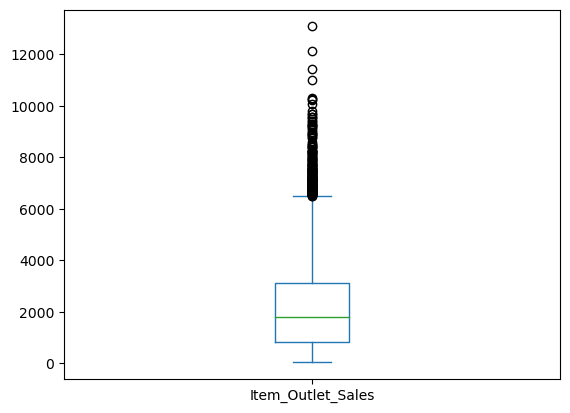

In [53]:
file.Item_Outlet_Sales.plot.box()

In [54]:
categorial_features = file.select_dtypes(include=[np.object])
categorial_features.head(2)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_news
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,Food
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,Food


In [55]:
categorial_features = file_test.select_dtypes(include=[np.object])
categorial_features.head(2)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_news
0,Low Fat,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1,Food
1,Regular,Dairy,OUT017,Medium,Tier 2,Supermarket Type1,Food


In [56]:
categorial_features = file.select_dtypes(include=[np.number])
categorial_features.head(2)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [57]:
categorial_features = file_test.select_dtypes(include=[np.number])
categorial_features.head(2)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.75,0.016047,107.8622,1999
1,8.30,0.019278,87.3198,2007


<AxesSubplot: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

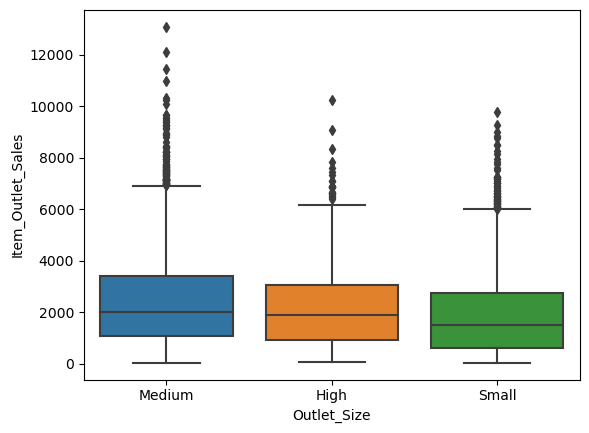

In [58]:
sns.boxplot(data=file,x='Outlet_Size',y='Item_Outlet_Sales')

<AxesSubplot: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

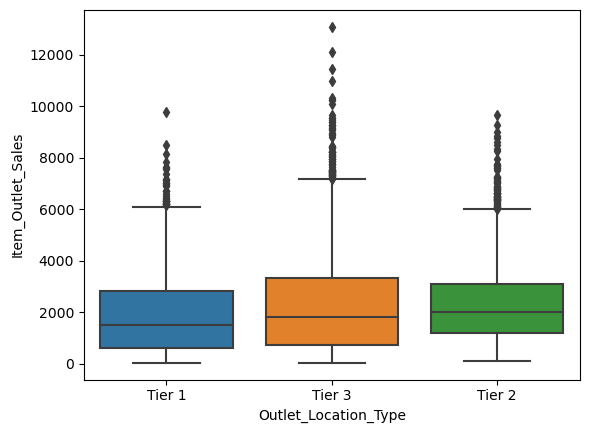

In [59]:
sns.boxplot(data=file,x='Outlet_Location_Type',y='Item_Outlet_Sales')

<AxesSubplot: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

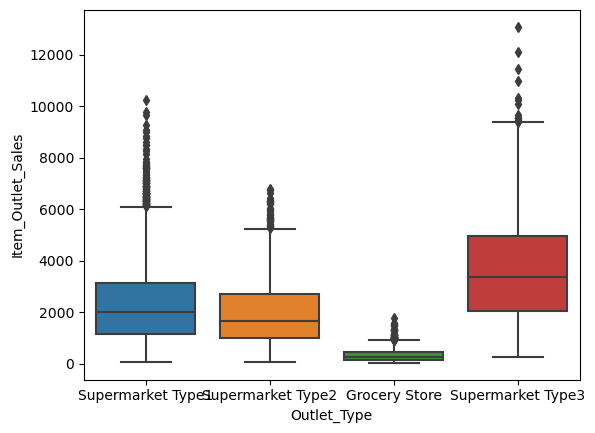

In [60]:
sns.boxplot(data=file,x='Outlet_Type',y='Item_Outlet_Sales')

<AxesSubplot: xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

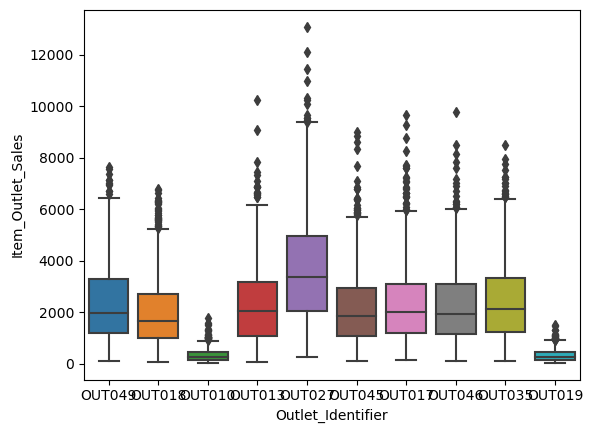

In [61]:
sns.boxplot(data=file,x='Outlet_Identifier', y='Item_Outlet_Sales')

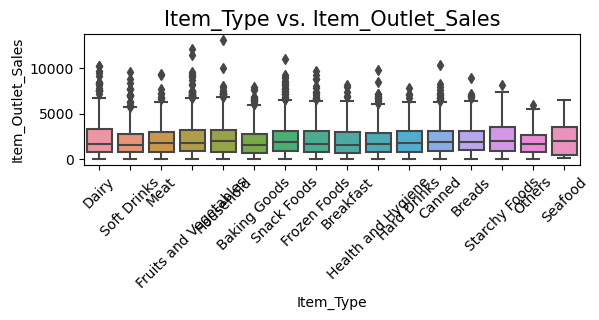

In [62]:
plt.subplot(211)
pl=sns.boxplot(data=file,x='Item_Type', y='Item_Outlet_Sales')
pl.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(pl.get_xticklabels(), rotation=45)
plt.show()

<AxesSubplot: xlabel='Outlet_Establishment_Year'>

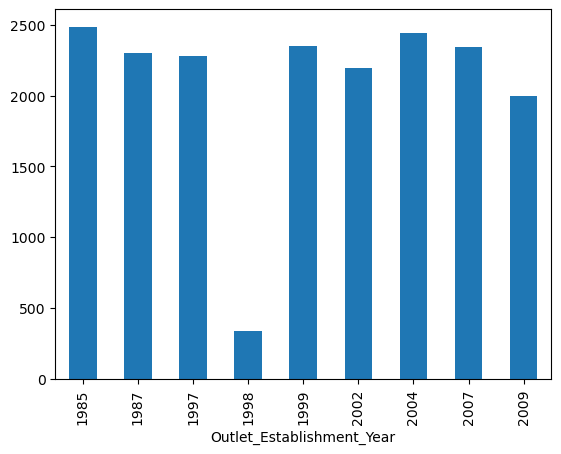

In [63]:
file.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

In [64]:
file=pd.get_dummies(file,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Identifier','Item_Identifier_news'])

In [65]:
file_test=pd.get_dummies(file_test,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Identifier','Item_Identifier_news'])

In [66]:
file.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Identifier_news_Drink,Item_Identifier_news_Food,Item_Identifier_news_Non-Consumables
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,19.20,0.066132,182.0950,1998,732.3800,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,8.93,0.066132,53.8614,1987,994.7052,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [67]:
file_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Identifier_news_Drink,Item_Identifier_news_Food,Item_Identifier_news_Non-Consumables
0,20.750000,0.016047,107.8622,1999,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,8.300000,0.019278,87.3198,2007,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,14.600000,0.016760,241.7538,1998,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7.315000,0.066132,155.0340,2007,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,12.857645,0.066132,234.2300,1985,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [68]:
y=file["Item_Outlet_Sales"]
x= file.drop(["Item_Outlet_Sales"],axis=1)
x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Identifier_news_Drink,Item_Identifier_news_Food,Item_Identifier_news_Non-Consumables
0,9.30,0.016047,249.8092,1999,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5.92,0.019278,48.2692,2009,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,1999,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,19.20,0.066132,182.0950,1998,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,8.93,0.066132,53.8614,1987,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [69]:
mx=MinMaxScaler()
pd.DataFrame(mx.fit_transform(x))

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.282525,0.038399,0.927507,0.583333,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.081274,0.048346,0.072068,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.770765,0.040593,0.468288,0.583333,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.871986,0.192593,0.640093,0.541667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.260494,0.192593,0.095805,0.083333,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,0.163812,0.777729,0.083333,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8519,0.227746,0.133638,0.326263,0.708333,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8520,0.359929,0.097321,0.228492,0.791667,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8521,0.158083,0.436080,0.304939,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.20)

In [71]:
X_test=file_test
X_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Identifier_news_Drink,Item_Identifier_news_Food,Item_Identifier_news_Non-Consumables
0,20.750000,0.016047,107.8622,1999,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,8.300000,0.019278,87.3198,2007,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,14.600000,0.016760,241.7538,1998,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7.315000,0.066132,155.0340,2007,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,12.857645,0.066132,234.2300,1985,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [72]:
mx=MinMaxScaler()
pd.DataFrame(mx.fit_transform(X_test))

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.964275,0.038356,0.323413,0.583333,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.222983,0.048304,0.235849,0.916667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.598095,0.040551,0.894140,0.541667,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.164335,0.192557,0.524488,0.916667,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.494352,0.192557,0.862069,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0.353974,0.283116,0.466011,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5677,0.181304,0.045585,0.584637,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5678,0.324204,0.257643,0.369798,0.708333,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5679,0.639774,0.436806,0.778487,0.916667,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [73]:
reg = LinearRegression()

In [74]:
reg2= RandomForestRegressor()

In [75]:
reg3= SVR()

In [76]:
reg4= DecisionTreeRegressor()

In [77]:
reg.fit(x_train,y_train)

LinearRegression()

In [78]:
reg2.fit(x_train,y_train)

RandomForestRegressor()

In [79]:
reg3.fit(x_train,y_train)

SVR()

In [80]:
reg4.fit(x_train,y_train)

DecisionTreeRegressor()

In [81]:
pred= reg.predict(x_test)

In [82]:
pred2=reg2.predict(x_test)

In [83]:
pred3=reg3.predict(x_test)

In [84]:
pred4=reg4.predict(x_test)

In [85]:
pred

array([2866.91681456,  584.18172606, 2043.77256118, ...,  822.24939348,
       3895.95651351, 2938.12979765])

In [86]:
pred2

array([2145.813478,  439.774216, 2283.520892, ...,  632.230364,
       4081.027758, 2665.470378])

In [87]:
pred3

array([1791.37391111, 1798.80378534, 1793.92029686, ..., 1785.97084457,
       1798.57985812, 1800.66057355])

In [88]:
pred4

array([2051.9956,  469.389 , 1018.674 , ...,  540.6296, 2255.7304,
       1605.9096])

In [89]:
mae(pred,y_test)

859.7930387174973

In [90]:
mae(pred2,y_test)

823.4226088258065

In [91]:
mae(pred3,y_test)

1359.4859840489125

In [92]:
mae(pred4,y_test)

1108.1325280938415

In [93]:
mse(pred,y_test)

1395808.5550142336

In [94]:
mse(pred2,y_test)

1425928.1728021817

In [95]:
mse(pred3,y_test)

3409952.224359916

In [96]:
mse(pred4,y_test)

2554676.7289542705

In [97]:
r2(pred,y_test)

0.15044018550006066

In [98]:
r2(pred2,y_test)

0.28367140870369545

In [99]:
r2(pred3,y_test)

-74272.24923376789

In [100]:
r2(pred4,y_test)

0.17631167515075508

In [101]:
main_test=reg4.predict(X_test)

In [102]:
main_test

array([ 970.7364, 1731.08  ,  751.0224, ..., 1118.544 , 6040.1376,
       1859.5794])

In [103]:
test=pd.read_csv('./Datasets/test_BigMartSales.csv')

In [104]:
test['Item_Outlet_Sales']=main_test

In [105]:
submission=test[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
submission.to_csv('submission_3.csv',index=False)

In [106]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,970.7364
1,FDW14,OUT017,1731.0800
2,NCN55,OUT010,751.0224
3,FDQ58,OUT017,2934.8464
4,FDY38,OUT027,3515.4240
...,...,...,...
5676,FDB58,OUT046,2002.7264
5677,FDD47,OUT018,3966.1706
5678,NCO17,OUT045,1118.5440
5679,FDJ26,OUT017,6040.1376
